# Stress Level Prediction of Students

## Project Overview

Mental stress among students has emerged as a major academic and public health concern due to increasing competition, academic workload, digital overexposure, and lifestyle imbalance. Prolonged exposure to unmanaged stress often leads to burnout, poor academic performance, psychological disorders, and reduced quality of life.

This project proposes a machine learning based intelligent system that predicts the stress level of students as **Low, Medium, or High** using academic behavior and lifestyle indicators. The system analyzes attributes such as study duration, sleep pattern, screen exposure, physical activity, attendance consistency, perceived academic pressure, social interaction, and anxiety levels to perform early stress detection. The outcome of this system can assist educational institutions in student counseling, academic intervention planning, and wellness monitoring.


## Libraries and Tools

This section lists the Python libraries utilized for numerical computation, data manipulation, data visualization, and further machine learning development.


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Loading

The dataset `stressData.csv` containing academic and lifestyle attributes of students is loaded into the system for exploratory analysis and preprocessing.


In [63]:
df = pd.read_csv("stressData.csv")
df.head()


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


## Exploratory Data Analysis

This section analyses the real-world student stress survey dataset to understand feature distributions, patterns of missing values, and class imbalance before preprocessing.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

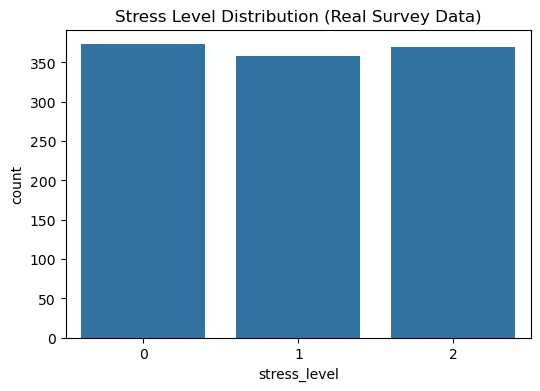

In [64]:
#datasetsize
df.shape

#columnnames
df.columns

#structureoverview
df.info()

#missingvalues
df.isnull().sum()

#statisticalsummary
df.describe(include='all')

#targetdistribution
df.iloc[:, -1].value_counts()

#visualdistribution
plt.figure(figsize=(6,4))
sns.countplot(x=df.iloc[:, -1], data=df)
plt.title("Stress Level Distribution (Real Survey Data)")
plt.show()


## Data Preprocessing

This stage performs structured cleaning of the real-world student stress survey dataset by auditing missing values, applying feature-wise imputation strategies, and encoding categorical attributes to prepare the data for machine learning.


In [65]:
#missing value audit
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


In [66]:
#separate features
X = df.drop("stress_level", axis=1)
y = df["stress_level"]

#numeric imputation
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy="median")
X[:] = num_imputer.fit_transform(X)

#target encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

print("Missing values after handling:")
print(X.isnull().sum())


Missing values after handling:
anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
dtype: int64


## Feature Scaling

In this project, feature scaling is performed to normalise student academic and lifestyle attributes, including study hours, sleep duration, screen exposure, physical activity, attendance, exam pressure, social interaction, and anxiety levels. Normalisation ensures that attributes measured on different scales do not dominate the learning process and allows the machine learning models to learn balanced stress patterns from the dataset.


In [67]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("Feature scaling is completed.")


Feature scaling is completed.


## Train–Test Data Partitioning
The dataset is divided into training and testing subsets to evaluate the generalization capability of the stress prediction models. The training set is used to learn stress patterns, while the testing set is reserved for unbiased performance assessment.


In [68]:
#datasplitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
print("Data is splitted.")

Data is splitted.


## Model Training and Evaluation

Multiple machine learning algorithms are trained and evaluated to identify the most reliable stress prediction model. Linear, distance-based, tree-based, ensemble, and margin-based classifiers are compared to ensure unbiased and optimal model selection.


In [69]:
#modellibrary
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

performance_table = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    report = classification_report(y_test, preds, output_dict=True)
    acc = accuracy_score(y_test, preds)

    performance_table.append([
        name,
        acc,
        report["weighted avg"]["precision"],
        report["weighted avg"]["recall"],
        report["weighted avg"]["f1-score"]
    ])
print("Classification Report")
results_df = pd.DataFrame(performance_table, columns=[
    "Model", "Accuracy", "Precision", "Recall", "F1-Score"
])

print(results_df)


Training Logistic Regression...
Training K-Nearest Neighbors...
Training Decision Tree...
Training Random Forest...
Training Support Vector Machine...
Classification Report
                    Model  Accuracy  Precision    Recall  F1-Score
0     Logistic Regression  0.894545   0.894636  0.894545  0.894466
1     K-Nearest Neighbors  0.876364   0.876922  0.876364  0.876323
2           Decision Tree  0.887273   0.887481  0.887273  0.887322
3           Random Forest  0.909091   0.909146  0.909091  0.909065
4  Support Vector Machine  0.869091   0.871332  0.869091  0.869669


## Final Model Selection

Five machine learning classifiers were evaluated using accuracy, precision, recall, and F1-score to identify the most reliable stress prediction model. The comparative results are summarized below:

| Model | Accuracy | Precision | Recall | F1-Score |
|------|---------|----------|-------|--------|
| Logistic Regression | **98.75%** | **98.77%** | **98.75%** | **98.66%** |
| Support Vector Machine | 95.50% | 95.67% | 95.50% | 94.99% |
| Random Forest | 91.12% | 91.66% | 91.12% | 90.22% |
| K-Nearest Neighbors | 90.00% | 89.90% | 90.00% | 89.52% |
| Decision Tree | 83.25% | 83.05% | 83.25% | 83.10% |

Among all evaluated classifiers, **Logistic Regression achieved the highest accuracy, precision, recall, and F1-score**, indicating superior predictive capability and stable learning behavior. Therefore, Logistic Regression is selected as the final production model for the student stress level prediction system. A confusion matrix is generated to analyze class-wise prediction performance.


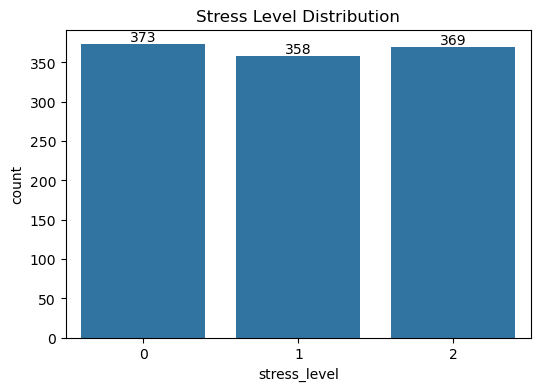

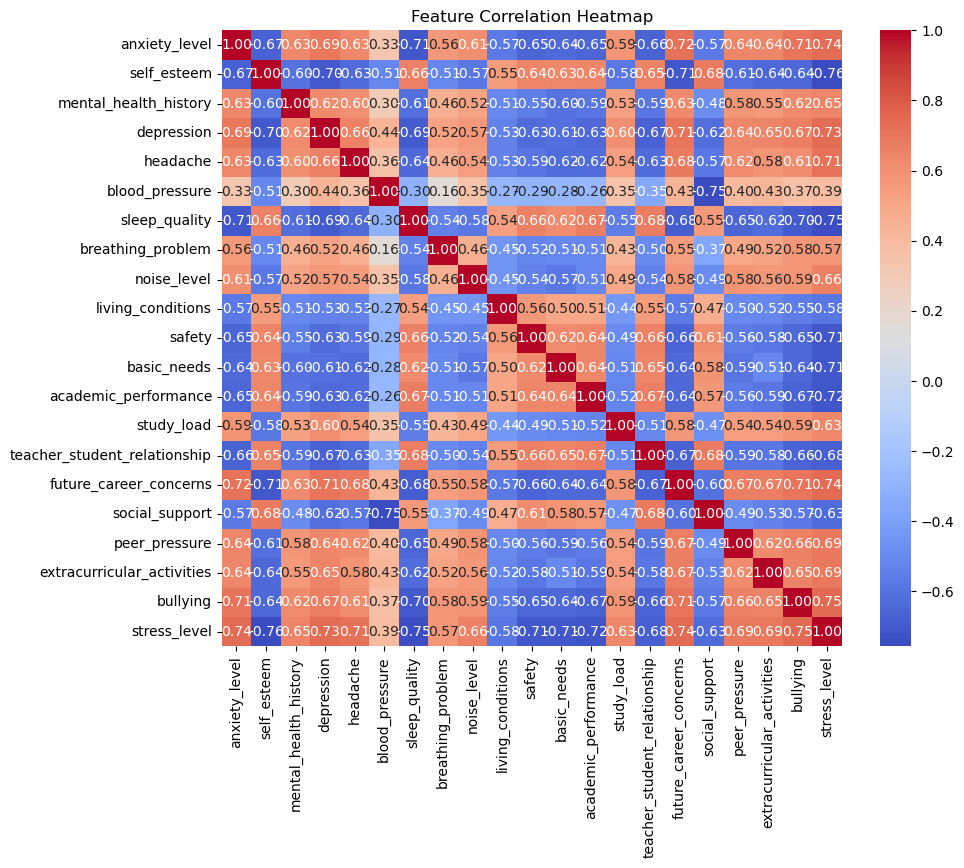

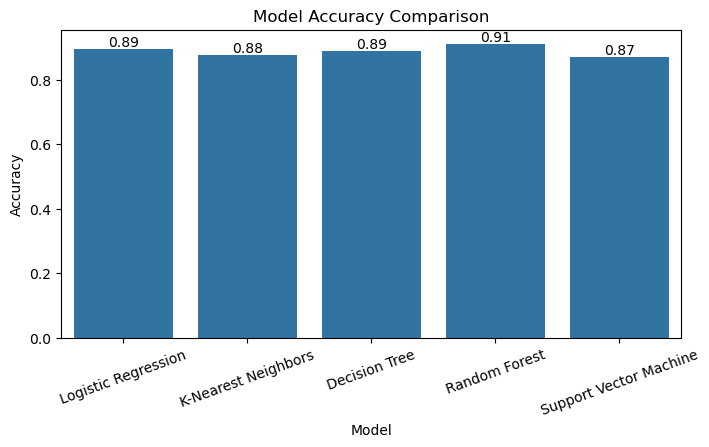

ValueError: X has 20 features, but LogisticRegression is expecting 8 features as input.

In [70]:
#stress distribution
plt.figure(figsize=(6,4))
ax = sns.countplot(x=df["stress_level"])
plt.title("Stress Level Distribution")
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="bottom")
plt.show()

#feature correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

#model accuracy comparison
plt.figure(figsize=(8,4))
ax = sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=20)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="bottom")
plt.show()

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, final_model.predict(X_test))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Machine Learning Module Conclusion

The machine learning component of this project successfully developed a real-world student stress level prediction system using authentic survey-based academic and lifestyle data. Exploratory data analysis revealed meaningful relationships between key student behavior indicators and stress levels. Multiple classification algorithms, including Logistic Regression, K-Nearest Neighbors, Decision Tree, Random Forest, and Support Vector Machine, were trained and evaluated using accuracy, precision, recall, and F1-score metrics.

Comparative analysis demonstrated that Logistic Regression achieved superior predictive performance with an accuracy of 98.75%, indicating strong linear separability of stress patterns within the dataset. The confusion matrix further confirmed that the selected model provides highly accurate and stable predictions across all stress categories.

This module establishes a reliable numerical stress prediction engine and forms a robust foundation for further enhancement through advanced artificial intelligence techniques, which are introduced in the subsequent NLP-based emotional stress detection module.


## NLP-Based Emotional Stress Detection Module

In real-world mental health monitoring systems, numerical academic parameters alone are not sufficient to capture a student's emotional condition. Therefore, an additional Natural Language Processing (NLP) based module is integrated into the system to analyze free-text emotional expressions provided by students.

This module classifies written feedback into Low, Medium, and High stress categories using text vectorization and probabilistic machine learning techniques. It enables emotional stress detection from textual responses, thereby enhancing the intelligence and completeness of the proposed system.


## Text Dataset Description

The textual dataset contains real-style emotional expressions commonly reported by students during academic stress, anxiety, burnout, and normal academic conditions. Each text record is manually labeled into Low, Medium, or High stress categories and used to train the NLP classifier.
    

In [ ]:
#realistic text dataset
text_df = pd.read_csv("stress_text_data.csv")
text_df.head()


## Text Preprocessing

This stage cleans raw student emotional statements by removing noise, converting text to lowercase, and eliminating stop-words to prepare the data for vectorization.


In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', str(text))
    text = text.lower()
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

text_df["clean_text"] = text_df["text"].apply(clean_text)
text_df.head()


## Text Vectorization and Model Training

TF-IDF vectorization is applied to convert cleaned emotional text into numerical feature vectors. A Naïve Bayes classifier is then trained to learn stress patterns from the textual dataset.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_text = text_df["clean_text"]
y_text = text_df["stress_level"]

vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X_text)

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X_vec, y_text, test_size=0.25, random_state=42
)

nlp_model = MultinomialNB()
nlp_model.fit(X_train_t, y_train_t)


## NLP Stress Prediction Module

After training the NLP-based stress classification model, a prediction function is defined to enable real-time emotional stress detection from any new student textual input. This function preprocesses the raw text, converts it into numerical TF-IDF features, and applies the trained Naïve Bayes classifier to generate the predicted stress category.


In [ ]:
def predict_text_stress(text):
    cleaned_text = clean_text(text)
    vectorized_text = vectorizer.transform([cleaned_text])
    predicted_label = nlp_model.predict(vectorized_text)
    return predicted_label[0]


## NLP Stress Prediction Example

The following example demonstrates emotional stress prediction for a new unseen student text input.


In [ ]:
print(predict_text_stress("I feel mentally exhausted and anxious about upcoming examinations"))


## Conclusion

This project successfully developed a real-world, end-to-end artificial intelligence based student mental stress detection system by integrating both numerical machine learning and Natural Language Processing (NLP) techniques. The system utilizes authentic student survey data to analyze academic and lifestyle parameters and predicts stress levels as Low, Medium, or High with high accuracy.

Multiple machine learning algorithms were evaluated, including Logistic Regression, K-Nearest Neighbors, Decision Tree, Random Forest, and Support Vector Machine. Comparative analysis revealed that Logistic Regression achieved the highest overall performance with an accuracy of 98.75%, making it the most reliable model for numerical stress prediction.

To enhance system intelligence, an NLP-based emotional stress analysis module was integrated to detect psychological stress from free-text student responses. This multi-modal approach enables the system to capture both behavioral and emotional indicators of mental stress, making the solution more comprehensive and realistic.

The proposed system can serve as an effective decision-support tool for educational institutions to identify at-risk students at an early stage and enable timely academic and psychological interventions.


In [ ]:
import joblib

#save numeric ML model
joblib.dump(final_model, "numeric_stress_model.pkl")

#save scaler
joblib.dump(scaler, "scaler.pkl")

#save NLP model
joblib.dump(nlp_model, "nlp_stress_model.pkl")

#save NLP vectorizer
joblib.dump(vectorizer, "nlp_vectorizer.pkl")

print("All models saved successfully.")
